In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

import os
import pandas_profiling

import scipy.stats as ss
from collections import Counter
import math

In [4]:
bank_data = pd.read_csv('../data/interim/bank_data_clean.csv')# Loading the full CSV data file

In [5]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,other,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank_data.rename(columns={'subscribed': 'response'}, inplace=True)

In [7]:
# Show duplicate observations
bank_data.loc[bank_data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,response
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,other,no,no,no,telephone,jul,thu,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,other,no,no,cellular,aug,mon,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,0,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,0,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [8]:
bank_data.drop_duplicates(inplace=True)

In [9]:
# Finds all of the categorical features along with the number their unique values
cat_cols = bank_data.select_dtypes(include=[object]).columns

In [10]:
for feature in cat_cols:
    uniq = np.unique(bank_data[feature])
    print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))

job: 12 distinct values -  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'other'
 'retired' 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital: 4 distinct values -  ['divorced' 'married' 'other' 'single']
education: 8 distinct values -  ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate' 'other'
 'professional.course' 'university.degree']
default: 3 distinct values -  ['no' 'other' 'yes']
housing: 3 distinct values -  ['no' 'other' 'yes']
loan: 3 distinct values -  ['no' 'other' 'yes']
contact: 2 distinct values -  ['cellular' 'telephone']
month: 10 distinct values -  ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week: 5 distinct values -  ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome: 3 distinct values -  ['failure' 'nonexistent' 'success']
response: 2 distinct values -  ['no' 'yes']


In [11]:
def categories_counts(feature, df=bank_data):
    ''' Calculates the count and percentage of each value of a categorical variable'''
    counts = pd.concat([df[feature].value_counts(), round(100 * df[feature].value_counts()/df.shape[0], 2)], axis=1)
    counts.columns=['count', '%']
    counts.reset_index(inplace =True)
    counts.rename(columns={'index': feature}, inplace=True)
    return counts

In [12]:
# Aggregates cat variables based on the passed dataframe and set of features
def cat_aggergator(df, features):
    '''This function aggregates the value counts of categorical values producing a new data frame '''
    df_list = []
    for var in features:
        count = categories_counts(var, df)
        count['idx'] = var
        count.rename(columns={var:'categories'}, inplace=True)
        df_list.append(count)
    df_aggregated = pd.concat(df_list)
    df_aggregated = df_aggregated.set_index(['idx', 'categories']).sort_index()
    return df_aggregated

In [14]:
all_cat_aggregated = cat_aggergator(bank_data, cat_cols)
print('The aggregated categories count for the enire data set is: \n')
all_cat_aggregated

The aggregated categories count for the enire data set is: 



count      %
idx         categories                       
contact     cellular             26135  63.47
            telephone            15041  36.53
day_of_week fri                   7826  19.01
            mon                   8512  20.67
            thu                   8618  20.93
            tue                   8086  19.64
            wed                   8134  19.75
default     no                   32577  79.12
            other                 8596  20.88
            yes                      3   0.01
education   basic.4y              4176  10.14
            basic.6y              2291   5.56
            basic.9y              6045  14.68
            high.school           9512  23.10
            illiterate              18   0.04
            other                 1730   4.20
            professional.course   5240  12.73
            university.degree    12164  29.54
housing     no                   18615  45.21
            other                  990   2.40
            yes                  21571  52.39
job         admin.               10419  25.30
            blue-collar           9253  22.47
            entrepreneur          1456   3.54
            housemaid             1060   2.57
            management            2924   7.10
            other                  330   0.80
            retired               1718   4.17
            self-employed         1421   3.45
            services              3967   9.63
            student                875   2.13
            technician            6739  16.37
            unemployed            1014   2.46
loan        no                   33938  82.42
            other                  990   2.40
            yes                   6248  15.17
marital     divorced              4611  11.20
            married              24921  60.52
            other                   80   0.19
            single               11564  28.08
month       apr                   2631   6.39
            aug                   6176  15.00
            dec                    182   0.44
            jul                   7169  17.41
            jun                   5318  12.92
            mar                    546   1.33
            may                  13767  33.43
            nov                   4100   9.96
            oct                    717   1.74
            sep                    570   1.38
poutcome    failure               4252  10.33
            nonexistent          35551  86.34
            success               1373   3.33
response    no                   36537  88.73
            yes                   4639  11.27

#### Imputing the missing values (defined as 'other' here) of **'loan'**, **'default'** and **'housing'** whith the most frequent values

In [15]:
def impute_most_frequent(feature):
    bank_data[feature].replace({'other': bank_data[feature].value_counts().index[0]}, inplace=True)

In [16]:
impute_most_frequent('loan')
impute_most_frequent('housing')
impute_most_frequent('default')

In [17]:
cat_aggergator(bank_data, cat_cols)

count      %
idx         categories                       
contact     cellular             26135  63.47
            telephone            15041  36.53
day_of_week fri                   7826  19.01
            mon                   8512  20.67
            thu                   8618  20.93
            tue                   8086  19.64
            wed                   8134  19.75
default     no                   41173  99.99
            yes                      3   0.01
education   basic.4y              4176  10.14
            basic.6y              2291   5.56
            basic.9y              6045  14.68
            high.school           9512  23.10
            illiterate              18   0.04
            other                 1730   4.20
            professional.course   5240  12.73
            university.degree    12164  29.54
housing     no                   18615  45.21
            yes                  22561  54.79
job         admin.               10419  25.30
            blue-collar           9253  22.47
            entrepreneur          1456   3.54
            housemaid             1060   2.57
            management            2924   7.10
            other                  330   0.80
            retired               1718   4.17
            self-employed         1421   3.45
            services              3967   9.63
            student                875   2.13
            technician            6739  16.37
            unemployed            1014   2.46
loan        no                   34928  84.83
            yes                   6248  15.17
marital     divorced              4611  11.20
            married              24921  60.52
            other                   80   0.19
            single               11564  28.08
month       apr                   2631   6.39
            aug                   6176  15.00
            dec                    182   0.44
            jul                   7169  17.41
            jun                   5318  12.92
            mar                    546   1.33
            may                  13767  33.43
            nov                   4100   9.96
            oct                    717   1.74
            sep                    570   1.38
poutcome    failure               4252  10.33
            nonexistent          35551  86.34
            success               1373   3.33
response    no                   36537  88.73
            yes                   4639  11.27

## Using Label Encoder to Transform the Response Variable to Numeric (Binary)

The values of the Target variable **response** should be changes from [yes, no] to [1, 0]. Sklearn Label Encoder can do the job.

In [18]:
# Copy the data
df = bank_data.copy()

In [19]:
# Import the LabelEncoder 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.response = le.fit_transform(bank_data['response'])

print('The new data type fo the response varuable is:', df.response.dtypes)

The new data type fo the response varuable is: int64


In [20]:
df.response.value_counts()

0    36537
1     4639
Name: response, dtype: int64

In [21]:
# Update the list of the categorical columns
cat_cols = df.select_dtypes(include=[object]).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

## Use One Hot Encoding to Transform the Remaining Categorical Variable

Here we use the implementation of OneHotEncoder in the [**Category Encoders**](https://contrib.scikit-learn.org/category_encoders/) package.

In [22]:
from category_encoders import OneHotEncoder

In [23]:
encoder = OneHotEncoder(cols=cat_cols ,handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [24]:
df_encoded = encoder.fit_transform(df)

In [25]:
print('The new features are {}:\n\n {}'.format(len(df_encoded.columns),  encoder.get_feature_names()))

The new features are 61:

 ['age', 'job_housemaid', 'job_services', 'job_admin.', 'job_blue-collar', 'job_technician', 'job_retired', 'job_management', 'job_unemployed', 'job_self-employed', 'job_other', 'job_entrepreneur', 'job_student', 'marital_married', 'marital_single', 'marital_divorced', 'marital_other', 'education_basic.4y', 'education_high.school', 'education_basic.6y', 'education_basic.9y', 'education_professional.course', 'education_other', 'education_university.degree', 'education_illiterate', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_telephone', 'contact_cellular', 'month_may', 'month_jun', 'month_jul', 'month_aug', 'month_oct', 'month_nov', 'month_dec', 'month_mar', 'month_apr', 'month_sep', 'day_of_week_mon', 'day_of_week_tue', 'day_of_week_wed', 'day_of_week_thu', 'day_of_week_fri', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_nonexistent', 'poutcome_failure', 'poutcome_success', 'emp_var_rate', 'cons_price_idx',

### Drop the **'duration'** Feature
The duration feature is not know before the call is made. Thus, this feature is not practical in modeling.

In [26]:
df_encoded = df_encoded.drop('duration', axis=1)

In [27]:
print('The new features are {}:\n'.format(len(df_encoded.columns)))

The new features are 60:



## Prepare the Data for Modeling: Train_Test_Split

In [28]:
# Get the name of dataframe
def get_df_name(df):
    '''Function to get the name of DataFrame'''
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [29]:
y = df_encoded.response
X = df_encoded.drop('response', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

data_sets =[X_train, X_test, y_train, y_test]

for d in data_sets:
    print(f'The shape of {get_df_name(d)}: {d.shape} {round(d.shape[0]/df_encoded.shape[0] *100, 0)}% \n')

The shape of X_train: (28823, 59) 70.0% 

The shape of X_test: (12353, 59) 30.0% 

The shape of y_train: (28823,) 70.0% 

The shape of y_test: (12353,) 30.0% 



In [30]:
# Bar plot for the distribution of the categorical fatures.
def distibution_bar_plot(feature, response= 'response'):

    fig, ax = plt.subplots(figsize=(8, 2))    
    # Ploting just the distribution of each variable values in the first subplot
    sns.countplot(y=feature, data=bank_data, order = bank_data[feature].value_counts().index, ax=ax)
    ax.set_title(f'The Percentage Count of "{feature}" Categories', )
    ax.set_xlabel('Percentage Count')
    ax.set_ylabel(f'{feature}')
    #ax.axis("off")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel(f'{feature}')
    total = len(bank_data[feature])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
        
    plt.show()
    

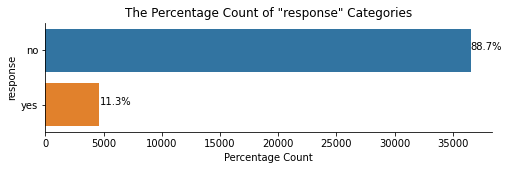

In [31]:
distibution_bar_plot('response')

### This is imbalanced dataset, we will do over-sampling to the training data set to cope with this issue.

### Over-Sampling Using SMOTE

In [32]:
from imblearn.over_sampling import SMOTE


In [33]:
oversample = SMOTE(sampling_strategy=0.5, n_jobs=-1, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [36]:
print('The resampled training data new classes ratio is:{}%'.format( y_train.value_counts()[1] / y_train.value_counts()[0] * 100))

The resampled training data new classes ratio is:50.0%


In [37]:
y_train.value_counts()

0    25576
1    12788
Name: response, dtype: int64

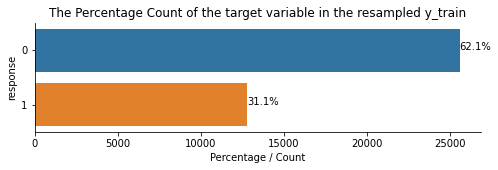

In [38]:
fig, ax = plt.subplots(figsize=(8, 2))    
# Ploting just the distribution of each variable values in the first subplot
sns.countplot(y='response', data= y_train.to_frame(), ax=ax)
ax.set_title(f'The Percentage Count of the target variable in the resampled y_train' )
ax.set_xlabel('Percentage / Count')
ax.set_ylabel('response')
#ax.axis("off")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(f'{feature}')
total = len(bank_data[feature])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

# Modeling

# Bayesian Hyperparameter Optimization using hyperopt

In [51]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.model_selection import cross_val_score
 

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

def hyperopt_train_test(params):
    clf = LogisticRegression(**params)
    cv_score = cross_val_score(clf, X_train, y_train, cv=cv,scoring='f1').mean()
    
    return {'model': clf, 'score': cv_score}


space = { 
             'warm_start' : hp.choice('warm_start', [True, False]),
             'fit_intercept' : hp.choice('fit_intercept', [True, False]),
             'tol' : hp.uniform('tol', 0.00001, 0.0001),
             'C' : hp.uniform('C', 0.05, 3),
             'solver' : hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
             'max_iter' : hp.choice('max_iter', range(100,1000)),
             'multi_class' : 'auto',
             'class_weight' : 'balanced'
      }

best = 0

def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    f1 = hyperopt_train_test(params)['score']
    if f1 > best:
      best = f1
      print( 'new best:', best, params)
    return {'loss': 1-f1, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=20, trials=trials)
print(best)
best = 0


new best:                                             
0.6493383850576929                                    
{'C': 1.2337942413297507, 'class_weight': 'balanced', 'fit_intercept': False, 'max_iter': 551, 'multi_class': 'auto', 'solver': 'lbfgs', 'tol': 4.463027404614427e-05, 'warm_start': True}
new best:                                                                       
0.6555462856170895                                                              
{'C': 1.7089652730767702, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 825, 'multi_class': 'auto', 'solver': 'liblinear', 'tol': 6.038434192657617e-05, 'warm_start': True}
new best:                                                                       
0.6557462825575652                                                              
{'C': 0.7541357544519206, 'class_weight': 'balanced', 'fit_intercept': False, 'max_iter': 945, 'multi_class': 'auto', 'solver': 'liblinear', 'tol': 2.8638406331066273e-05, 'warm_start': Tru

In [59]:
def getBestModelfromTrials(trials):
    valid_trial_list = [trial for trial in trials
                            if STATUS_OK == trial['result']['status']]
    losses = [ float(trial['result']['loss']) for trial in valid_trial_list]
    index_having_minumum_loss = np.argmin(losses)
    best_trial_obj = valid_trial_list[index_having_minumum_loss]
    return best_trial_obj['result']['Trained_Model']


In [96]:
lr_model = getBestModelfromTrials(trials)
lr_model

LogisticRegression(C=0.10356811639859197, class_weight='balanced', max_iter=582,
                   solver='newton-cg', tol=9.00695967772851e-05,
                   warm_start=True)

In [97]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.10356811639859197, class_weight='balanced', max_iter=582,
                   solver='newton-cg', tol=9.00695967772851e-05,
                   warm_start=True)

In [156]:
def plot_roc_curve(X_test, y_test, model, model_name):
    
    y_pred_proba = model.predict_proba(X_test)
    rf_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    print('Area Under the Receiver Operating Characteristic Curve = ', rf_auc)
    fpr, tpr, _ =  roc_curve(y_test, y_pred_proba[:,1])

    plt.plot(fpr, tpr, marker='.', label=f'{model_name} (AUROC = %0.3f)' % rf_auc)

    # Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     10961
           1       0.35      0.64      0.46      1392

    accuracy                           0.83     12353
   macro avg       0.65      0.75      0.68     12353
weighted avg       0.88      0.83      0.85     12353

Area Under the Receiver Operating Characteristic Curve =  0.7957822247529645


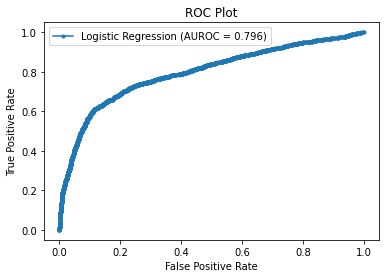

In [157]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_roc_curve(X_test, y_test, lr_model, 'Logistic Regression')

In [44]:
import itertools

# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[10545   416]
 [  926   466]]


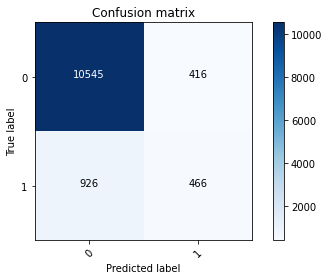

In [100]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


## Feature Importance

In [104]:
hasattr(lr_model, 'feature_importances_')

False

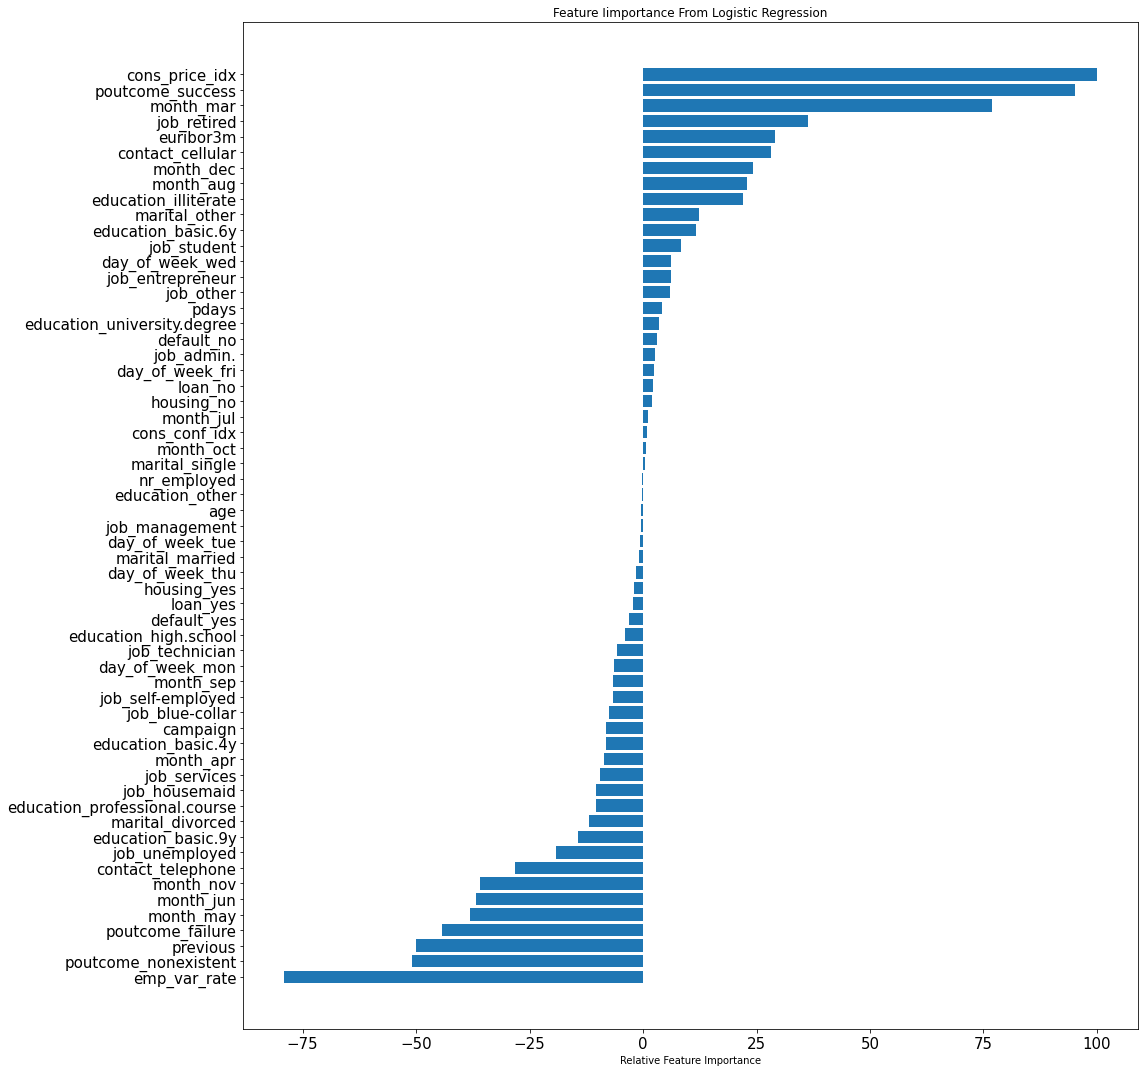

In [141]:
feature_importance = (lr_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(16, 15))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
featax.tick_params(axis='both', which='major', labelsize=15)
featax.set_title('Feature Iimportance From Logistic Regression')
plt.tight_layout()   
plt.show()

### Permutation Importances 

In [120]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2046 ± 0.0018,emp_var_rate
0.1382 ± 0.0039,cons_price_idx
0.0691 ± 0.0028,euribor3m
0.0270 ± 0.0018,month_may
0.0270 ± 0.0021,poutcome_nonexistent
0.0185 ± 0.0006,month_nov
0.0182 ± 0.0013,poutcome_success
0.0145 ± 0.0010,previous
0.0110 ± 0.0009,cons_conf_idx
0.0109 ± 0.0018,poutcome_failure


1. Precision: It is implied as the measure of the correctly identified positive cases from all the predicted positive cases. Thus, it is useful when the costs of False Positives is high.

2. Recall: It is the measure of the correctly identified positive cases from all the actual positive cases. It is important when the cost of False Negatives is high.




## Decision Tree

In [167]:
from sklearn.tree import DecisionTreeClassifier


def hyperopt_train_test(params):
    dt_clf = DecisionTreeClassifier(**params)
    cv_score = cross_val_score(dt_clf, X_train, y_train, cv=cv,scoring='f1').mean()
    
    return {'model': dt_clf, 'score': cv_score}

space={"splitter":hp.choice('splitter', ["best","random"]),
            "max_depth" : hp.choice('max_depth', range(1,100)),
           "min_samples_leaf":hp.choice('min_samples_leaf', range(1,5)),
           "min_weight_fraction_leaf":hp.uniform('min_weight_fraction_leaf', 0.1, 0.5),
           "max_features": hp.choice('max_features', ["auto","log2","sqrt",None]),
           "max_leaf_nodes":hp.choice('max_leaf_nodes',[None,10,20,30,40,50,60,70,80,90]),
           'criterion': hp.choice('criterion', ["gini", "entropy"])
      }

best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    f1 = hyperopt_train_test(params)['score']
    if f1 > best:
      best = f1
      print( 'new best:', best, params)
    return {'loss': 1-f1, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=100, trials=trials)
print(best)



new best:                                              
0.19263156026924744                                    
{'criterion': 'entropy', 'max_depth': 63, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.15545431324502523, 'splitter': 'best'}
new best:                                                                        
0.582399457585586                                                                
{'criterion': 'entropy', 'max_depth': 33, 'max_features': None, 'max_leaf_nodes': 90, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.16640230663162775, 'splitter': 'best'}
new best:                                                                        
0.5858062022661467                                                              
{'criterion': 'entropy', 'max_depth': 13, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.23620207655697678, 'splitter': 'best'}
new best:              

In [168]:
dt_model = getBestModelfromTrials(trials)
dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=59, max_leaf_nodes=10,
                       min_weight_fraction_leaf=0.40225879221448724)

In [169]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=59, max_leaf_nodes=10,
                       min_weight_fraction_leaf=0.40225879221448724)

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     10961
           1       0.25      0.73      0.38      1392

    accuracy                           0.73     12353
   macro avg       0.60      0.73      0.60     12353
weighted avg       0.88      0.73      0.77     12353

Area Under the Receiver Operating Characteristic Curve =  0.7284414268666233


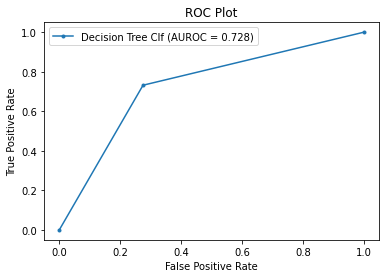

In [170]:
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_roc_curve(X_test, y_test, dt_model, 'Decision Tree Clf')

Confusion matrix, without normalization
[[7945 3016]
 [ 373 1019]]


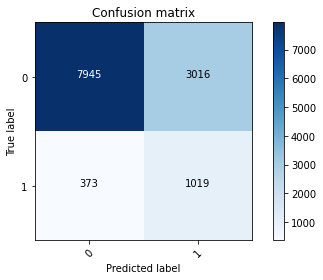

In [171]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


## Feature Importance

In [162]:
hasattr(dt_model, 'feature_importances_')

True

In [ ]:
feature_importance = dt_model.feature_importances_


In [164]:
feature_importance

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

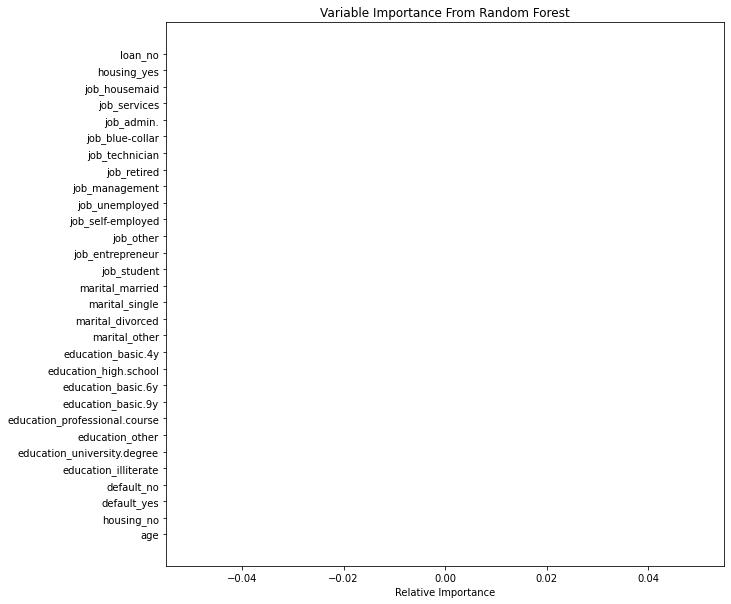

In [163]:
feature_importance = dt_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance From Random Forest')
plt.show();

### Permutation Importances 

In [120]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2046 ± 0.0018,emp_var_rate
0.1382 ± 0.0039,cons_price_idx
0.0691 ± 0.0028,euribor3m
0.0270 ± 0.0018,month_may
0.0270 ± 0.0021,poutcome_nonexistent
0.0185 ± 0.0006,month_nov
0.0182 ± 0.0013,poutcome_success
0.0145 ± 0.0010,previous
0.0110 ± 0.0009,cons_conf_idx
0.0109 ± 0.0018,poutcome_failure


# Random Forest

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials , space_eval
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def hyperopt_train_test(params):
    rf_clf = RandomForestClassifier(**params)
    cv_score = cross_val_score(rf_clf, X_train, y_train, cv=cv,scoring='f1').mean()
    
    return {'model': rf_clf, 'score': cv_score}

space = {
    'max_depth': hp.choice('max_depth', range(1,50)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
            }
best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    f1 = hyperopt_train_test(params)['score']
    if f1 > best:
      best = f1
      print( 'new best:', best, params)
    return {'loss': 1-f1, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=100, trials=trials)
print(best)

new best:                                              
0.8169471671655287                                     
{'criterion': 'gini', 'max_depth': 17, 'max_features': 3, 'n_estimators': 4}
new best:                                                                         
0.8522163867058054                                                                
{'criterion': 'gini', 'max_depth': 49, 'max_features': 2, 'n_estimators': 7}      
new best:                                                                         
0.8580165281141301                                                                
{'criterion': 'gini', 'max_depth': 35, 'max_features': 4, 'n_estimators': 7}      
new best:                                                                         
0.861927873235585                                                                
{'criterion': 'entropy', 'max_depth': 41, 'max_features': 2, 'n_estimators': 14} 
new best:                                                         

In [126]:
rf_model = getBestModelfromTrials(trials)


In [127]:
rf_model

RandomForestClassifier(criterion='entropy', max_depth=17, max_features=4,
                       n_estimators=18)

In [128]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, max_features=4,
                       n_estimators=18)

In [129]:
rf_model.score(X_test, y_test)

0.8936290779567716

In [130]:
 # Sort the trials with lowest loss (highest AUC) first
bayes_trials_results = sorted(trials.results, key = lambda x: x['loss'])
bayes_trials_results[:2]

[{'loss': 0.05310376433991071,
  'status': 'ok',
  'Trained_Model': RandomForestClassifier(criterion='entropy', max_depth=17, max_features=4,
                         n_estimators=18)},
 {'loss': 0.05448911185645866,
  'status': 'ok',
  'Trained_Model': RandomForestClassifier(max_depth=16, max_features=4, n_estimators=18)}]

In [131]:
trials.best_trial

{'state': 2,
 'tid': 15,
 'spec': None,
 'result': {'loss': 0.05310376433991071,
  'status': 'ok',
  'Trained_Model': RandomForestClassifier(criterion='entropy', max_depth=17, max_features=4,
                         n_estimators=18)},
 'misc': {'tid': 15,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'criterion': [15],
   'max_depth': [15],
   'max_features': [15],
   'n_estimators': [15]},
  'vals': {'criterion': [1],
   'max_depth': [16],
   'max_features': [3],
   'n_estimators': [17]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2021, 7, 8, 8, 9, 46, 911000),
 'refresh_time': datetime.datetime(2021, 7, 8, 8, 10, 0, 680000)}

In [132]:
y_pred_proba = model.predict_proba(X_test)


In [81]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score


Area Under the Receiver Operating Characteristic Curve =  0.7937471555368196


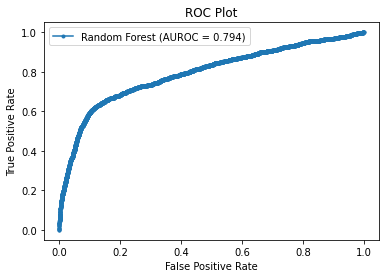

In [133]:
plot_roc_curve(X_test, y_test, rf_model)

Confusion matrix, without normalization
[[10561   400]
 [  914   478]]


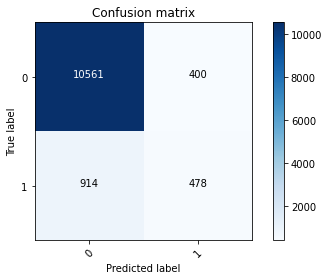

In [134]:
y_pred = rf_model.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10961
           1       0.54      0.34      0.42      1392

    accuracy                           0.89     12353
   macro avg       0.73      0.65      0.68     12353
weighted avg       0.88      0.89      0.88     12353



### Features Importance

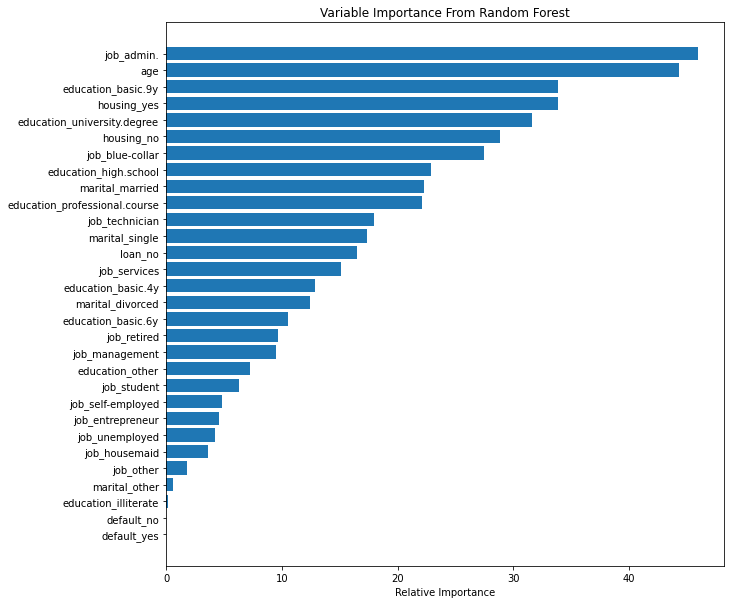

In [139]:
feature_importance = rf_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance From Random Forest')
plt.show();

In [138]:
rf_model

RandomForestClassifier(criterion='entropy', max_depth=17, max_features=4,
                       n_estimators=18)

In [137]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0036 ± 0.0003,poutcome_failure
0.0022 ± 0.0010,poutcome_nonexistent
0.0007 ± 0.0011,day_of_week_tue
0.0007 ± 0.0011,day_of_week_thu
0.0006 ± 0.0008,education_high.school
0.0006 ± 0.0006,housing_no
0.0006 ± 0.0004,education_professional.course
0.0006 ± 0.0019,day_of_week_mon
0.0005 ± 0.0009,day_of_week_wed
0.0005 ± 0.0003,marital_single


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC


In [ ]:
clf = SVC(**params)

In [ ]:

def hyperopt_train_test(params):
#     X_ = X_train.copy()
#     if 'normalize' in params:
#         if params['normalize'] == 1:
#             X_ = normalize(X_)
#             del params['normalize']
#     if 'scale' in params:
#         if params['scale'] == 1:
#             X_ = scale(X_)
#             del params['scale']
    clf = SVC(**params)
    cv_score = cross_val_score(clf, X_train, y_train, cv=cv,scoring='roc_auc').mean()
    
    return {'model': clf, 'score': cv_score}

space = {
             'C': hp.uniform('C', 0, 20),
             'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
             'gamma': hp.uniform('gamma', 0, 20),
             
         }
best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    auc = hyperopt_train_test(params)['score']
    if auc > best:
      best = auc
      print( 'new best:', best, params)
    return {'loss': 1-auc, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=5, trials=trials)
print(best)

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

In [79]:
model.mean()

0.9318134144878614

In [70]:
from sklearn import metrics

In [72]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we